# Deep Q Network
---
In this notebook, we train DQN with the Unity Banana environment
### 1. Install/Import the Necessary Packages# Deep Q Network

In [1]:
import os, sys
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.6/site-packages"

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import os, torch, time, datetime
from collections import deque
import matplotlib.pyplot as plt
from dqn_agent import Agent

start_time = time.time()

### 2. Instantiate Environment and Agent

Run the code cell below to print some information about the environment

In [3]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])
agent = Agent(state_size, action_size,seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the agent with DQN

Run the code cell below to train the agent from scratch. Alternatively, you can skip to the next code cell to load the pre-trained weights from a file.

Episode 100	Average Score: 0.74
Episode 200	Average Score: 4.72
Episode 300	Average Score: 7.96
Episode 400	Average Score: 9.25
Episode 500	Average Score: 12.19
Episode 527	Average Score: 13.01
Environment solved in 527 episodes!	Average Score: 13.01


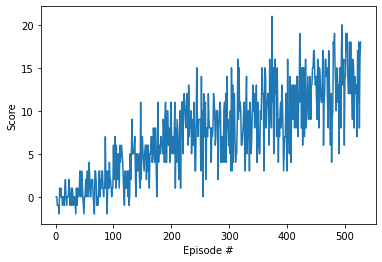

In [4]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    '''
    Deep Q-Learning
    
    Params
    ======
        env (user-defined Unity-ML environment class): Unity-ML environment in which the agent is to be trained
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    '''
    scores = []                                            # list containing scores from each episode
    scores_window = deque(maxlen=100)                      # last 100 scores
    eps = eps_start                                        # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment in training mode
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize score
        for t in range(max_t):
            action = agent.act(state, eps)                 # agent takes action
            action = action.astype(np.int32)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state,action,reward,next_state,done)# update agent action value function 
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)                        # save most recent score
        scores.append(score)                               # save most recent score
        eps = max(eps_end, eps_decay*eps)                  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:                           #Taking an average score every 100 episodes
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_actor.pth')
        if np.mean(scores_window)>=13.0:                   #Checking if environment has been solved
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'solution_actor.pth')
            break
    return scores

scores = dqn(n_episodes=1000, max_t=1000)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1,len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('training_performance.png')
plt.show()

### 4. Test the Agent

Test the agent by running the code cells below! Objective of the testing is to ensure that the agent can achieve an average score of 13 over 100 consecutive episodes. The plot produced will show the training scores for each episode and a line representing the average over the 100 episodes.

Episode 100	Score: 11.73
Episode 100	Average Score: 11.73


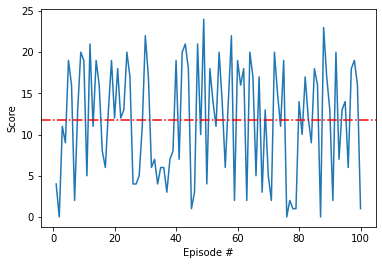

Training took  1:19:33.389018


In [6]:
def test(episodes=100):
    '''
    Demonstrate Trained Agent Performance
    
    Params
    ======
        env (user-defined Unity-ML environment class): Unity-ML environment in which the agent is to be trained
        agentFile (str): path to the trained agent checkpoint .pth file that contains the trained weights
        demoEpisodes (int): maximum number of demonstration episodes
        max_t (int): maximum number of time steps per episode
    '''
    scores = []                                            # list containing scores from each episode
    agent.qnetwork_local.load_state_dict(torch.load('solution_actor.pth')) # initialize Q-network with loaded weights
    for i_episode in range(1,episodes+1):
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment in demonstration mode
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize score
        while True:
            action = agent.act(state)                      # trained agent takes action
            action = action.astype(np.int32)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        #scores_window.append(score)                        # save most recent score
        scores.append(score)                               # save most recent score
        print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, np.mean(scores)), end="")
        if i_episode % 100 == 0:                           #Taking an average score every 100 episodes
            print('\nEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
    return scores

scores = test(episodes=100)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1,len(scores)+1), scores)
plt.axhline(np.mean(scores), color='r', linestyle='-.', label='Mean Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('trained_agent_performance.png')
plt.show()

execution_time = time.time() - start_time
print("Training took ",str(datetime.timedelta(seconds=execution_time)))

When finished, you can close the environment.

In [7]:
env.close()